## Inference Image Test notebook ##


In [1]:
import sys, os
sys.path.append("./models/")
sys.path.append("./datasets/")
sys.path.append("./utils/")

In [2]:
import beautydataset
import beautynetv2
import image_preprocess
import beautynet_inference

In [3]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from skimage import io
import face_alignment
import torchvision
import matplotlib.pyplot as plt
import glob
from skimage.transform import resize
import torchvision.transforms as transforms
import torchvision.datasets.folder as folder
from PIL import Image
from tqdm import tqdm
import random

## cuda 사용 필수 ##

In [5]:
net = beautynetv2.BeautyNetV2().cuda()

In [6]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, enable_cuda=True)

In [7]:
# save_state = "./checkpoints/beautynet_04121419_no_person"
# save_state = "./checkpoints/beautynet_04130954_no_person"
# save_state = "./checkpoints/beautynet_04181047_no_person"
save_state = "./checkpoints/beautynetv2_04251556.best"
net = beautynet_inference.load_model(net, save_state)

In [8]:
def show_img_and_landmarks(img):
    """
    numpy image array -> landmark + image
    return landmark (68 x 2)
    """
    fig = plt.figure(figsize=(50,50))
    ax = fig.add_subplot(121)
    ax.imshow(img)
    ax = fig.add_subplot(122)
    ax.imshow(img)
    markersize = 5
    preds = fa.get_landmarks(img)[0]
    # 턱선
    ax.plot(preds[0:17,0],preds[0:17,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    # 오른눈썹
    ax.plot(preds[17:22,0],preds[17:22,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    # 왼눈썹
    ax.plot(preds[22:27,0],preds[22:27,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    # 콧대
    ax.plot(preds[27:31,0],preds[27:31,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    # 콧구멍라인
    ax.plot(preds[31:36,0],preds[31:36,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    # 오른눈
    ax.plot(preds[36:42,0],preds[36:42,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=1)
    # 왼눈
    ax.plot(preds[42:48,0],preds[42:48,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    # 입술 밖
    ax.plot(preds[48:60,0],preds[48:60,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    # 입술 안
    ax.plot(preds[60:68,0],preds[60:68,1],marker='o',markersize=markersize,linestyle='-',color='w',lw=2)
    ax.axis('off')
    return preds

## 학습 데이터에 대한 결과 확인 ##
- 샘플 이미지들에 대한 결과(실제 라벨 데이터도 있음)
- 여기서 결과가 이상하면 모델 학습이 이상한 것

In [9]:
image_list = glob.glob(os.path.join('./datasets/ImageFolder/', "*.jpg"))
true_data = pd.read_csv("./datasets/median.csv")

In [13]:
random.shuffle(image_list)

In [15]:
import imp 
beautynet_inference = imp.reload(beautynet_inference)


tensor(95455.6250)
expected score4.855579853057861, true_score[3.61666667]
tensor(84598.4766)
expected score3.4483022689819336, true_score[2.55]
tensor(1.00000e+05 *
       1.3136)
expected score4.0737433433532715, true_score[3.18333333]
tensor(1.00000e+05 *
       1.1962)
expected score4.387578964233398, true_score[4.18333333]
tensor(84646.0156)
expected score3.9435715675354004, true_score[2.25]

In [16]:
net.eval()
pred_list = []
for i, path in (enumerate(image_list[:5])):
    score = beautynet_inference.inference_image(fa, net, path)
    pred_list.append(score)
    true_score =  true_data.loc[true_data['Filename'] == path, "Rating"].values
    print(f"expected score{score}, true_score{true_score}")

expected score3.657076120376587, true_score[3.53333333]
expected score2.462186336517334, true_score[2.38333333]
expected score2.474315643310547, true_score[2.53333333]
expected score3.883577585220337, true_score[2.6]
expected score3.031222105026245, true_score[2.75]


In [51]:
image_path = "./datasets/celebs/celeb12.jpg"

In [52]:
score = beautynet_inference.inference_image(fa, net, image_path)
score

4.274840831756592

/home/jongho/anaconda3/envs/pt4/lib/python3.6/site-packages/face_alignment-0.1.0-py3.6.egg/face_alignment/api.py:185: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


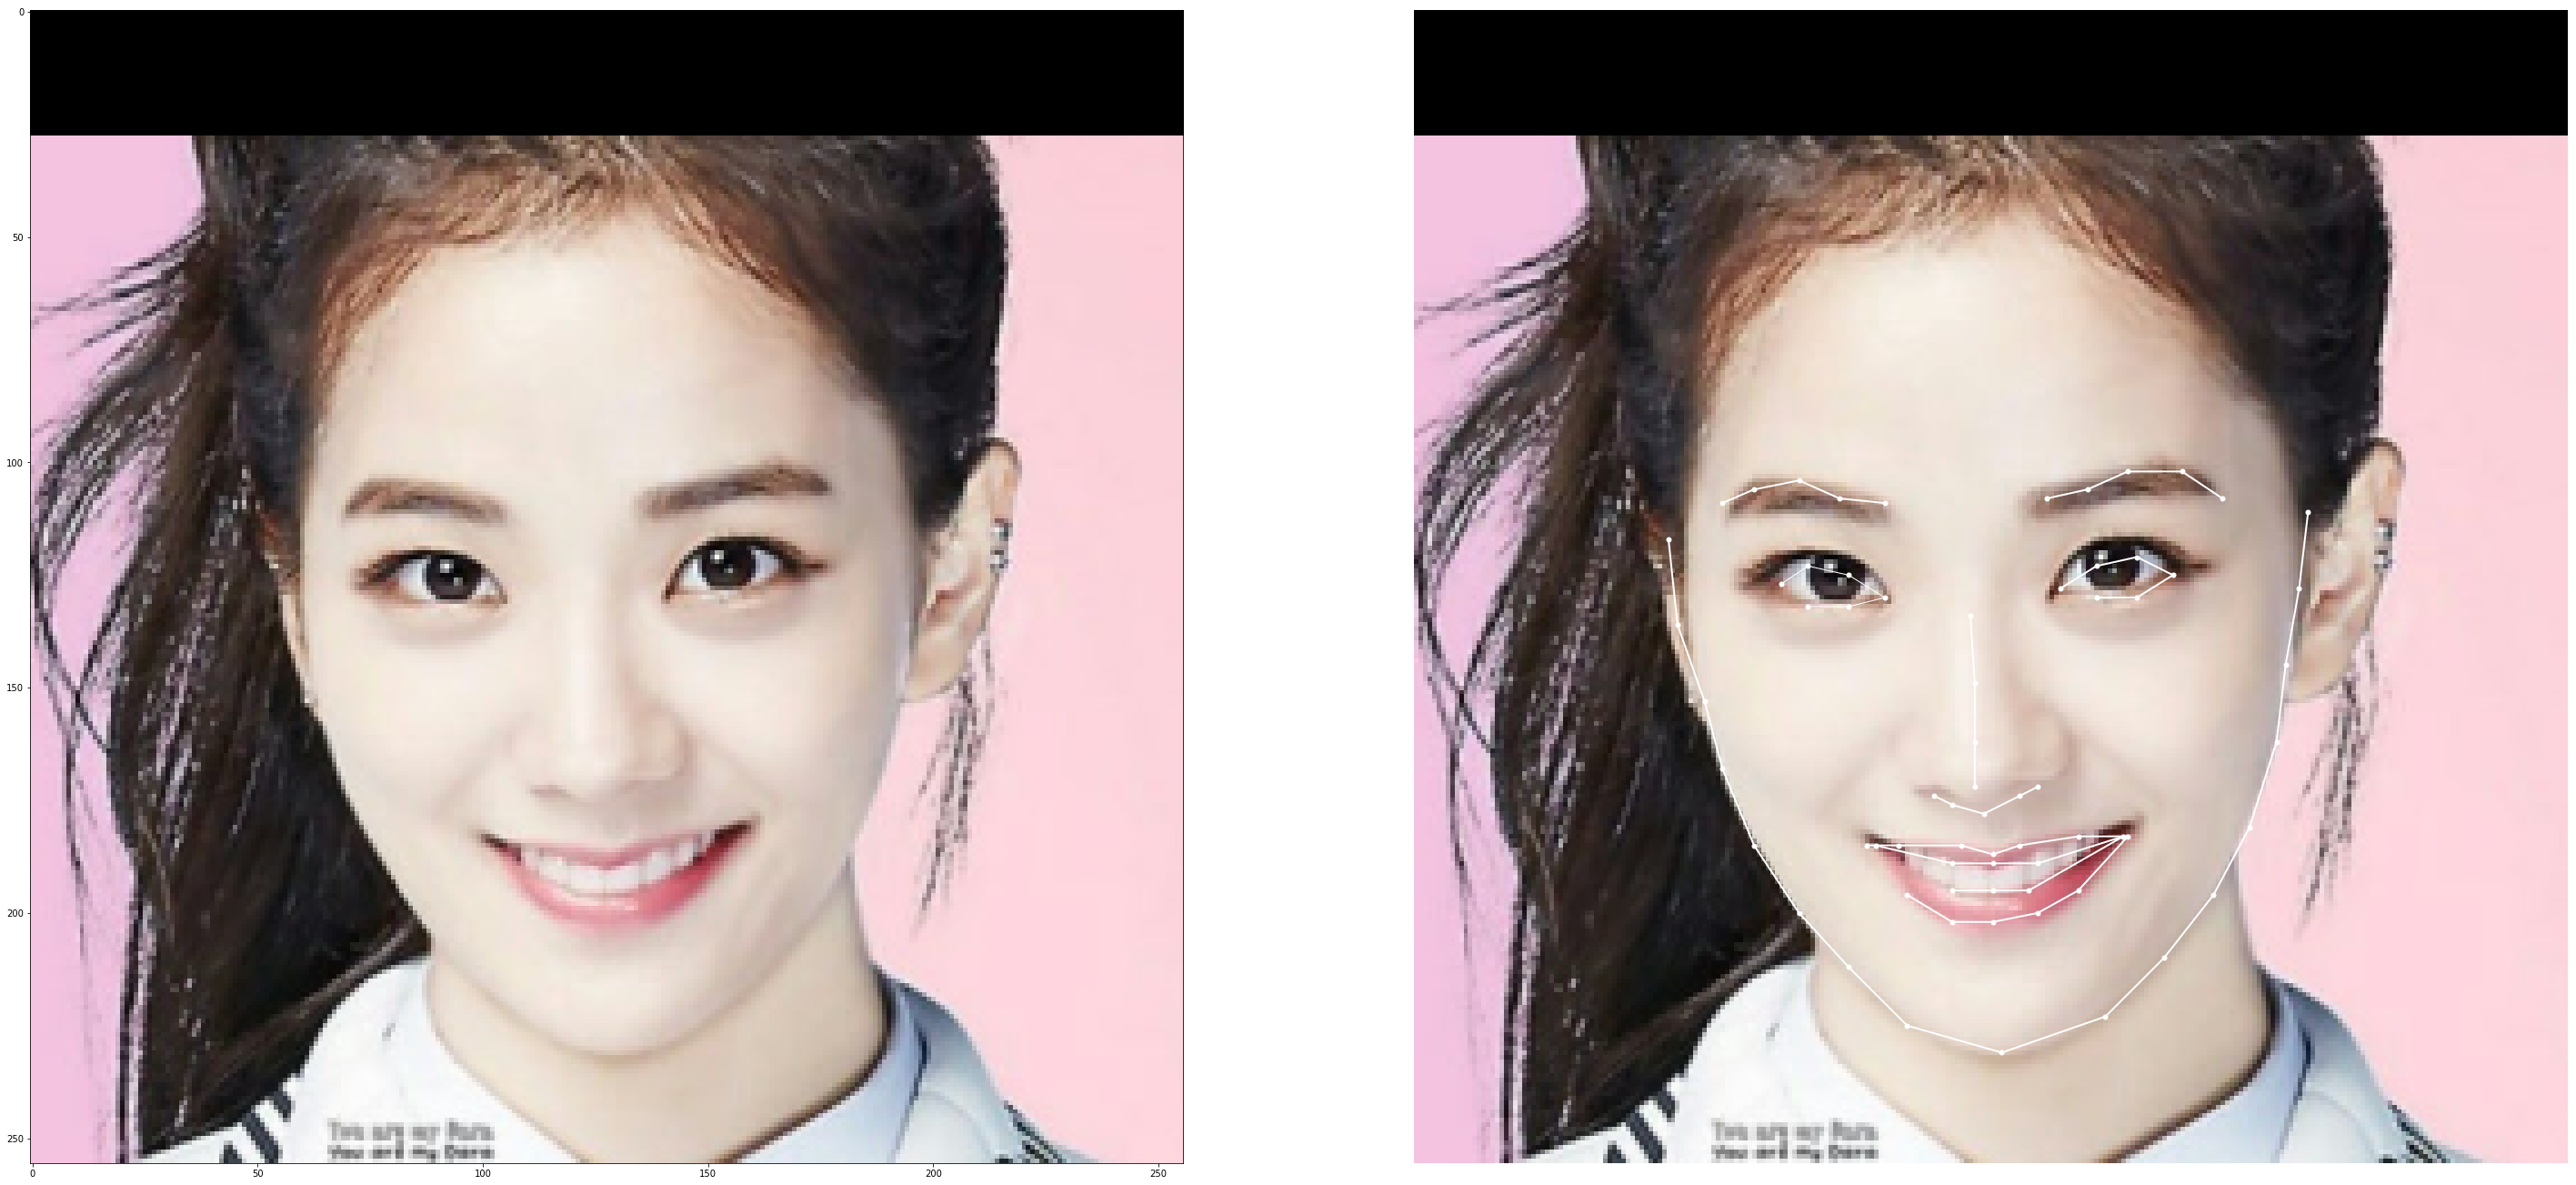

In [53]:
crop_img = image_preprocess.get_cropped_sample(fa, io.imread(image_path))
_ = show_img_and_landmarks(crop_img)